In [3]:
import pandas as pd
import random

data = pd.read_csv("dataset/goodreads_interactions.csv")
data

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0
...,...,...,...,...,...
228648337,876144,24772,0,0,0
228648338,876144,23847,1,4,0
228648339,876144,23950,1,3,0
228648340,876144,374106,1,5,1


In [6]:
set(list(data['user_id']))

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [2]:
interactions = data
#filter those with valid rating value
interactions = interactions.loc[interactions['rating'] > 3]#.sample(500000)
interactions

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0
...,...,...,...,...,...
228648327,876144,70626,1,4,0
228648329,876144,572059,1,5,0
228648338,876144,23847,1,4,0
228648340,876144,374106,1,5,1


In [3]:
book_groups = interactions.groupby('book_id').user_id.count()
print(len(book_groups))
# listtt = book_groups[book_groups>1].index.tolist()
listtt = random.sample(book_groups[book_groups>2].index.tolist(), 1000)
# listtt = random.sample(list(dict.fromkeys(interactions['book_id'])), 100000)
len(listtt)

2063058


1000

In [4]:
interactions = interactions[interactions['book_id'].isin(listtt)]
interactions

,user_id,book_id,is_read,rating,is_reviewed
9271,13,8108,1,4,0
16230,21,14453,1,4,0
17499,24,15198,1,4,0
22538,34,17856,1,5,1
31167,67,21939,1,4,0
...,...,...,...,...,...
228608418,875231,65302,1,5,0
228613899,875359,632759,1,5,0
228621418,875524,153759,1,5,0
228625304,875616,153869,1,4,0


In [65]:


users_groups = interactions.groupby('user_id').book_id.count()
print(users_groups.shape[0])
# listt = users_groups[users_groups>1000].index.tolist()
listt = random.sample(list(set(list(dict.fromkeys(interactions['user_id'])))), 10000)
print(len(listt))


684121
10000


In [66]:
interactions = interactions[interactions['user_id'].isin(listt)]
interactions

,user_id,book_id,is_read,rating,is_reviewed
17098,23,14973,1,4,1
17106,23,14966,1,4,0
17123,23,1402,1,5,0
17142,23,6788,1,4,0
17149,23,944,1,4,0
...,...,...,...,...,...
228626824,875652,24943,1,4,0
228627715,875671,85354,1,5,0
228628577,875691,2824,1,5,1
228628580,875691,1466526,1,4,0


In [5]:
grouped = interactions.groupby('book_id')
print(grouped.count())

         user_id  is_read  rating  is_reviewed
book_id                                       
1943         513      513     513          513
2632         353      353     353          353
3002         166      166     166          166
3527          59       59      59           59
4132         131      131     131          131
...          ...      ...     ...          ...
2089144        3        3       3            3
2098968        3        3       3            3
2102871        3        3       3            3
2120654        3        3       3            3
2229064        3        3       3            3

[1000 rows x 4 columns]


In [6]:
grouped.user_id.count().mean()

35.595

In [43]:
%%script false --no-raise-error

# def process_group(group_name, group_df):
#     print(f"{group_name} started")
#     t = time.process_time()
#     edges = []
#     for i in range(group_df.shape[0] - 1):
#         for j in range(i + 1, group_df.shape[0]):
#             edges.append((int(group_df.iloc[i]['user_id']), int(group_df.iloc[j]['user_id'])))
    
#     elapsed_time = time.process_time() - t
#     print(f"{group_name} with {len(group_df)} took {elapsed_time:.2f} seconds")

# process_group('20', grouped.get_group(41))

In [ ]:
%%script false --no-raise-error

def process_group(group_name, group_df):
    print(f"{group_name} started")
    t = time.time()
    edges = []
    ll = group_df['user_id'].tolist()
    for i in range(len(ll) - 1):
        for j in range(i + 1, len(ll)):
            edges.append((int(ll[i]), int(ll[j])))
    
    elapsed_time = time.time() - t
    print(f"{group_name} with {len(group_df)} took {elapsed_time:.3f} seconds")

process_group('41', grouped.get_group(41))

In [7]:
# %%script false --no-raise-error

import concurrent.futures
import networkx as nx
import time

G = nx.Graph()

def process_group(group_name, group_df):
    print(f"{group_name} started")
    t = time.time()
    edges = []
    ll = group_df['user_id'].tolist()
    for i in range(len(ll) - 1):
        for j in range(i + 1, len(ll)):
            edges.append((int(ll[i]), int(ll[j])))
    
    elapsed_time = time.time() - t
    print(f"{group_name} with {len(group_df)} took {elapsed_time:.3f} seconds")
    return edges

with concurrent.futures.ThreadPoolExecutor(1000) as executor:
    # Submit each group to the executor
    futures = [executor.submit(process_group, group_name, group_df) for group_name, group_df in grouped]

# Wait for all tasks to complete
concurrent.futures.wait(futures)

all_edges = set(v for f in futures for v in f.result())
print(len(all_edges))
G.add_edges_from(all_edges)


1943 started
1943 with 513 took 0.016 seconds
2632 started
2632 with 353 took 0.000 seconds
3002 started
3002 with 166 took 0.000 seconds
3527 started
3527 with 59 took 0.000 seconds
4132 started
4132 with 131 took 0.000 seconds
5747 started
5747 with 7 took 0.000 seconds
6583 started
6797 started
6797 with 250 took 0.002 seconds
6583 with 886 took 0.046 seconds
7699 started
7699 with 53 took 0.000 seconds
7961 started
8108 started
8108 with 41 took 0.000 seconds
9058 started
9058 with 421 took 0.004 seconds
10771 started
10771 with 62 took 0.000 seconds
12169 started
12169 with 466 took 0.004 seconds
7961 with 1267 took 0.090 seconds
13034 started
13034 with 380 took 0.000 seconds
13245 started
13831 started
13831 with 196 took 0.002 seconds
13245 with 360 took 0.017 seconds
14453 started
15198 started
16507 started15198 with 955 took 0.048 seconds
16905 started
16905 with 208 took 0.000 seconds

16507 with 55 took 0.000 seconds
14453 with 888 took 0.079 seconds
17856 started
17856 wi

In [8]:
print(G.number_of_edges())
print(G.number_of_nodes())
print((G.number_of_edges()*2)/G.number_of_nodes())

6575734
31628
415.8172505374984


In [ ]:
# len(list(nx.all_neighbors(G, 30200)))
sorted((d for n, d in G.degree()), reverse=True)


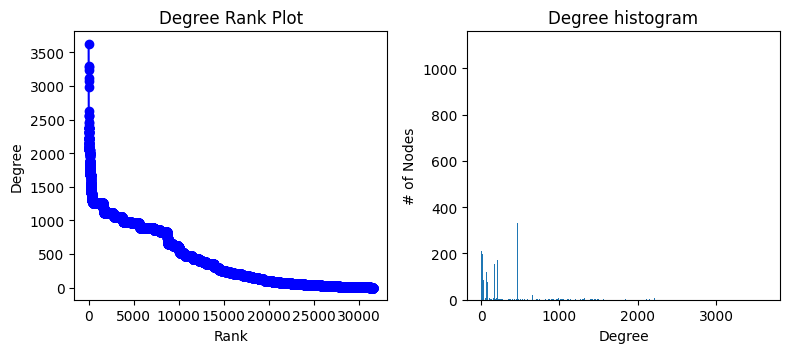

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# G = nx.gnp_random_graph(100, 0.02, seed=10374196)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

# ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

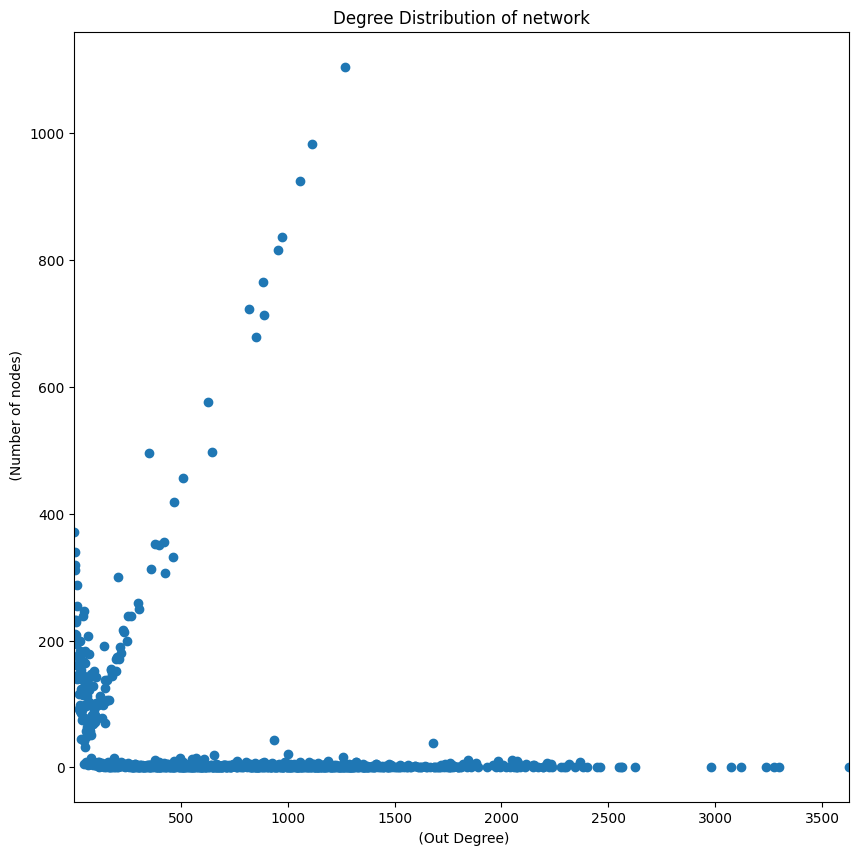

In [10]:
import numpy as np
import matplotlib.pyplot as plt


out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

plt.figure(figsize=(10,10))
plt.xlim(min(x), max(x))
plt.xlabel(' (Out Degree)')
plt.ylabel(' (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(x, y, 'o')

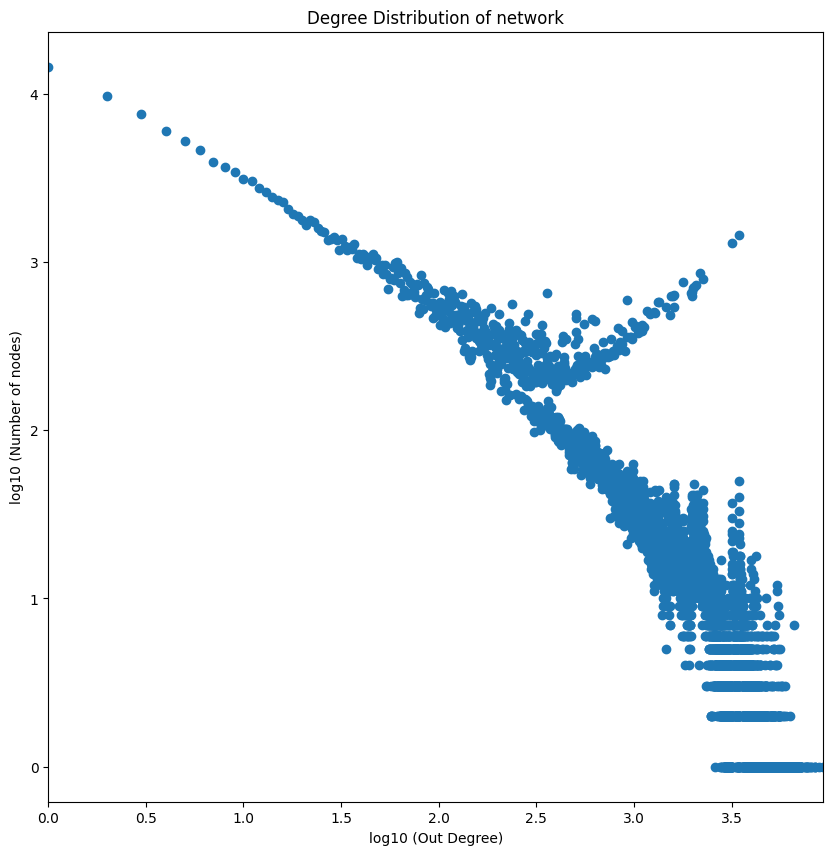

In [9]:
## degree Distribution
import numpy as np
out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(logx, logy, 'o')